In [4]:
import pandas as pd

# Unggah file di Colab (jika belum)
from google.colab import files
uploaded = files.upload()

# Membaca CSV
df = pd.read_csv("13.6 Tingkat Pengangguran Terbuka dan Tingkat Partisipasi Angkatan Kerja (TPAK) Menurut Kabupaten_Kota di Provinsi Jawa Tengah, 2019-2023_) - Sheet1.csv")
df.head()


Saving 13.6 Tingkat Pengangguran Terbuka dan Tingkat Partisipasi Angkatan Kerja (TPAK) Menurut Kabupaten_Kota di Provinsi Jawa Tengah, 2019-2023_) - Sheet1.csv to 13.6 Tingkat Pengangguran Terbuka dan Tingkat Partisipasi Angkatan Kerja (TPAK) Menurut Kabupaten_Kota di Provinsi Jawa Tengah, 2019-2023_) - Sheet1.csv


,Tabel,13.6,"Tingkat Pengangguran Terbuka dan Tingkat Partisipasi Angkatan Kerja (TPAK) Menurut Kabupaten/Kota di Provinsi Jawa Tengah, 2019-2023*)",Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Table,NaN,Unemployment Rate (UR) and Labour Force Partic...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Kabupaten/Kota\n Regency/Municipality,TPT/UR,NaN,NaN,NaN,NaN,TPAK/LFPR,NaN,NaN,NaN,NaN
3,NaN,2019,2020,2021,2022,2023,2019,2020,2021,2022,2023
4,1,2,3,4,5,6,7,8,9,10,11


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tampilkan grafik dalam style lebih menarik
sns.set(style="whitegrid")

# Load file (ganti dengan nama file yang sesuai di Google Colab)
file_path = "/content/13.6 Tingkat Pengangguran Terbuka dan Tingkat Partisipasi Angkatan Kerja (TPAK) Menurut Kabupaten_Kota di Provinsi Jawa Tengah, 2019-2023_) - Sheet1.csv"
df_raw = pd.read_csv(file_path, skiprows=4)

# Tampilkan beberapa baris awal
df_raw.head()


,Unnamed: 0,2019,2020,2021,2022,2023,2019.1,2020.1,2021.1,2022.1,2023.1
0,1,2,3,4,5,6,7,8,9,10,11
1,Kabupaten/Regency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Cilacap,"7,24","9,1","9,97","9,62","8,74","65,34","67,79","62,91","65,65","66,6"
3,Banyumas,"4,17",6,"6,05","6,05","6,35","67,34","66,66","65,07","64,75","64,6"
4,Purbalingga,"4,73","6,1","6,05","5,23","5,61","68,14","69,89","69,52","73,47","73,45"


In [10]:
# Rename kolom agar lebih mudah digunakan
df_raw.columns = [
    "Kabupaten_Kota",
    "TPT_2019", "TPT_2020", "TPT_2021", "TPT_2022", "TPT_2023",
    "TPAK_2019", "TPAK_2020", "TPAK_2021", "TPAK_2022", "TPAK_2023"
]

# Hapus baris kosong dan baris jumlah
df = df_raw.dropna()
df = df[~df["Kabupaten_Kota"].str.contains("Jumlah", na=False)]
df = df.reset_index(drop=True)

# Bersihkan koma dan konversi ke float
cols_to_clean = df.columns[1:]  # semua kolom kecuali nama kota
for col in cols_to_clean:
    df[col] = df[col].astype(str).str.replace(",", ".").str.replace(r"[^\d.]", "", regex=True).astype(float)

# Cek hasil bersih
df.head()


,Kabupaten_Kota,TPT_2019,TPT_2020,TPT_2021,TPT_2022,TPT_2023,TPAK_2019,TPAK_2020,TPAK_2021,TPAK_2022,TPAK_2023
0,1,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,10.00,11.00
1,Cilacap,7.24,9.10,9.97,9.62,8.74,65.34,67.79,62.91,65.65,66.60
2,Banyumas,4.17,6.00,6.05,6.05,6.35,67.34,66.66,65.07,64.75,64.60
3,Purbalingga,4.73,6.10,6.05,5.23,5.61,68.14,69.89,69.52,73.47,73.45
4,Banjarnegara,4.44,5.86,5.86,6.38,6.26,70.09,69.69,69.76,72.17,71.64


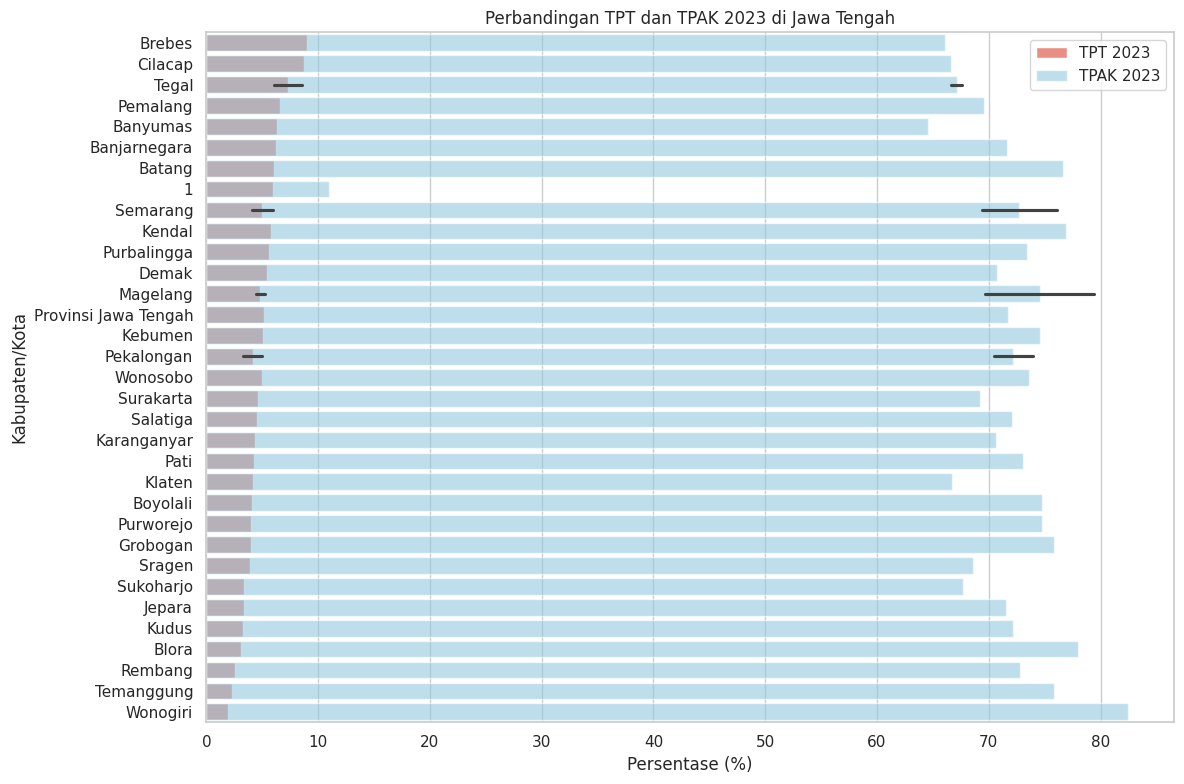

In [11]:
# Sort berdasarkan TPT 2023
df_sorted = df.sort_values(by="TPT_2023", ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x="TPT_2023", y="Kabupaten_Kota", data=df_sorted, label="TPT 2023", color="salmon")
sns.barplot(x="TPAK_2023", y="Kabupaten_Kota", data=df_sorted, label="TPAK 2023", color="skyblue", alpha=0.6)

plt.xlabel("Persentase (%)")
plt.ylabel("Kabupaten/Kota")
plt.title("Perbandingan TPT dan TPAK 2023 di Jawa Tengah")
plt.legend()
plt.tight_layout()
plt.show()


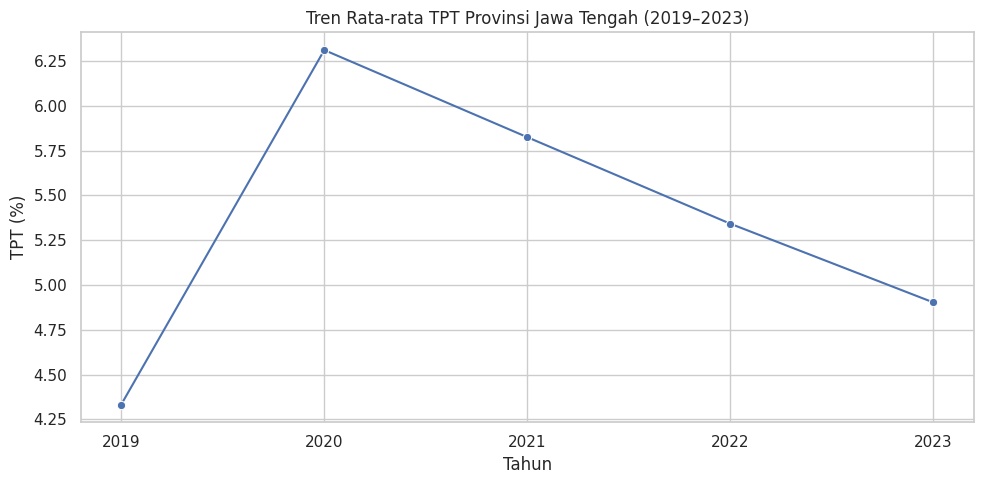

In [12]:
# Hitung rata-rata TPT per tahun
tpt_years = ["TPT_2019", "TPT_2020", "TPT_2021", "TPT_2022", "TPT_2023"]
rata_tpt = df[tpt_years].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=rata_tpt.index.str.extract("(\d+)$")[0], y=rata_tpt.values, marker='o')
plt.title("Tren Rata-rata TPT Provinsi Jawa Tengah (2019–2023)")
plt.xlabel("Tahun")
plt.ylabel("TPT (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


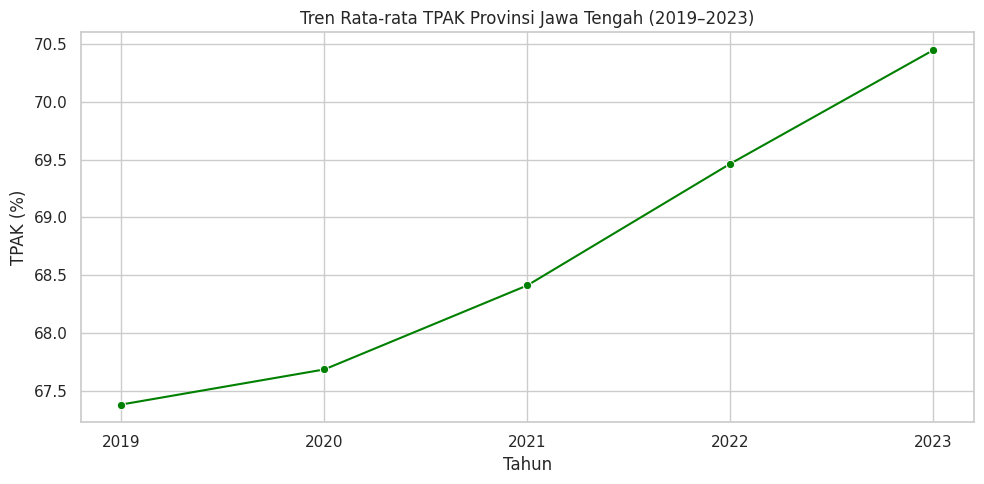

In [13]:
tpak_years = ["TPAK_2019", "TPAK_2020", "TPAK_2021", "TPAK_2022", "TPAK_2023"]
rata_tpak = df[tpak_years].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=rata_tpak.index.str.extract("(\d+)$")[0], y=rata_tpak.values, marker='o', color="green")
plt.title("Tren Rata-rata TPAK Provinsi Jawa Tengah (2019–2023)")
plt.xlabel("Tahun")
plt.ylabel("TPAK (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
# Install streamlit dan pyngrok
!pip install streamlit pyngrok --quiet


In [17]:
%%writefile dashboard_jateng.py
import streamlit as st
import pandas as pd
import plotly.express as px

st.title("Dashboard Interaktif: TPT & TPAK Jawa Tengah (2019–2023)")

uploaded_file = st.file_uploader("Upload dataset CSV", type="csv")

if uploaded_file:
    df_raw = pd.read_csv(uploaded_file)

    df_raw.columns = [
        "Kabupaten_Kota",
        "TPT_2019", "TPT_2020", "TPT_2021", "TPT_2022", "TPT_2023",
        "TPAK_2019", "TPAK_2020", "TPAK_2021", "TPAK_2022", "TPAK_2023"
    ]

    df = df_raw.dropna()
    df = df[~df["Kabupaten_Kota"].str.contains("Jumlah", na=False)].reset_index(drop=True)

    for col in df.columns[1:]:
        df[col] = df[col].astype(str).str.replace(",", ".").str.replace(r"[^\d.]", "", regex=True).astype(float)

    kabupaten_list = df["Kabupaten_Kota"].unique().tolist()
    selected_kabupaten = st.sidebar.multiselect("Pilih Kabupaten/Kota", kabupaten_list, default=kabupaten_list[:5])

    tahun_list = ["2019", "2020", "2021", "2022", "2023"]
    selected_year = st.sidebar.selectbox("Pilih Tahun", tahun_list)

    df_filtered = df[df["Kabupaten_Kota"].isin(selected_kabupaten)]

    st.subheader(f"TPT Kabupaten/Kota - {selected_year}")
    fig_tpt = px.bar(
        df_filtered,
        x="Kabupaten_Kota",
        y=f"TPT_{selected_year}",
        title=f"Tingkat Pengangguran Terbuka (TPT) {selected_year}",
        labels={f"TPT_{selected_year}": "TPT (%)"},
        color=f"TPT_{selected_year}",
        color_continuous_scale="Reds"
    )
    st.plotly_chart(fig_tpt, use_container_width=True)

    st.subheader(f"TPAK Kabupaten/Kota - {selected_year}")
    fig_tpak = px.bar(
        df_filtered,
        x="Kabupaten_Kota",
        y=f"TPAK_{selected_year}",
        title=f"Tingkat Partisipasi Angkatan Kerja (TPAK) {selected_year}",
        labels={f"TPAK_{selected_year}": "TPAK (%)"},
        color=f"TPAK_{selected_year}",
        color_continuous_scale="Blues"
    )
    st.plotly_chart(fig_tpak, use_container_width=True)

    st.markdown("### Rata-rata TPT dan TPAK Provinsi (2019–2023)")
    avg_tpt = df[[f"TPT_{y}" for y in tahun_list]].mean()
    avg_tpak = df[[f"TPAK_{y}" for y in tahun_list]].mean()

    fig_line = px.line(
        x=tahun_list,
        y=[avg_tpt.values, avg_tpak.values],
        labels={"x": "Tahun", "value": "Persentase (%)"},
        title="Tren Rata-rata Provinsi",
    )
    fig_line.update_traces(mode='lines+markers')
    fig_line.data[0].name = "TPT"
    fig_line.data[1].name = "TPAK"

    st.plotly_chart(fig_line, use_container_width=True)
else:
    st.warning("Silakan upload file CSV terlebih dahulu.")


Writing dashboard_jateng.py


In [23]:
from pyngrok import ngrok

# Set authtoken kamu dulu (hanya perlu sekali per sesi Colab)
ngrok.set_auth_token("2xf7hHd5hS4YUAQEF5foekTvUvh_6GzZGMUEJDWcsPpwVEk5J")

# Jalankan streamlit app kamu (misalnya disimpan di dashboard_jateng.py)
!streamlit run dashboard_jateng.py &>/content/log.txt &

# Hubungkan ke streamlit via ngrok
public_url = ngrok.connect(addr=8501, proto='http')
print("📢 Streamlit URL:", public_url)





📢 Streamlit URL: NgrokTunnel: "https://1622-34-150-136-13.ngrok-free.app" -> "http://localhost:8501"
